In [28]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv("test2_oc.csv")

In [21]:
df.head()

,game_index,winner,claude_start,openai_start,claude_net,openai_net
0,0,claude,10000,10000,4140,-4140
1,1,openai,10000,10000,-1140,1140
2,2,openai,10000,10000,-6,6
3,3,openai,10000,10000,-144,144
4,4,claude,10000,10000,10,-10


In [22]:
df["claude_net"].sum()

7156

In [23]:
df["openai_net"].sum()

-7156

In [24]:
x = df["claude_net"].values.astype(float)

# Compute summary stats
mean_x = np.mean(x)
std_x = np.std(x, ddof=1)
n = len(x)

# Two-sided one-sample t-test against 0
t_stat, p_value = stats.ttest_1samp(x, popmean=0)

print("Number of hands:", n)
print("Mean payoff:", mean_x)
print("Std dev:", std_x)
print("t-statistic:", t_stat)
print("p-value (two-sided):", p_value)

Number of hands: 100
Mean payoff: 71.56
Std dev: 648.3607818447562
t-statistic: 1.103706485706817
p-value (two-sided): 0.2723960129232845


In [25]:
import numpy as np
from scipy.stats import binom_test, norm

# Convert your winner column to 1 for Claude, 0 for GPT
df["claude_win"] = (df["winner"] == "claude").astype(int)

# Number of hands
n = len(df)

# Number Claude wins
k = df["claude_win"].sum()

# Sample win rate
p_hat = k / n

print("Hands:", n)
print("Claude wins:", k)
print("Win rate:", p_hat)

# Two-sided exact binomial test
p_value_exact = binom_test(k, n, p=0.5, alternative="two-sided")
print("Exact binomial p-value:", p_value_exact)

# Normal approximation z-test (also two-sided)
z = (p_hat - 0.5) / np.sqrt(0.25 / n)
p_value_z = 2 * (1 - norm.cdf(abs(z)))

print("z-statistic:", z)
print("Normal approx p-value:", p_value_z)


Hands: 100
Claude wins: 51
Win rate: 0.51
Exact binomial p-value: 0.9204107626128208
z-statistic: 0.20000000000000018
Normal approx p-value: 0.8414805811217938


/var/folders/kw/_b9n4sf12qs7lzdq53j8x5kc0000gn/T/ipykernel_435/1613993525.py:21: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value_exact = binom_test(k, n, p=0.5, alternative="two-sided")


In [55]:
df2 = pd.read_csv("test1_1.csv")

In [56]:
df2.head()

,game_index,winner,player0_start,player1_start,player2_start,player0_net,player1_net,player2_net
0,0,1,1000000,1000000,1000000,-52.0,54.0,-2.0
1,1,2,999948,1000054,999998,4.0,-2.0,-2.0
2,2,2,999952,1000052,999996,-1.0,1.0,0.0
3,3,1,999951,1000053,999996,-160.0,168.0,-8.0
4,4,0,999791,1000221,999988,-24.0,25.0,-1.0


In [65]:
def plot_cumulative_net(df2):
    # Compute cumulative net for each player
    df2["player0_cum"] = df2["player0_net"].cumsum()
    df2["player1_cum"] = df2["player1_net"].cumsum()
    df2["player2_cum"] = df2["player2_net"].cumsum()

    # Compute total net (sanity check: should be 0 each row)
    df2["total_net"] = df2["player0_net"] + df2["player1_net"] + df2["player2_net"]
    df2["total_cum"] = df2["total_net"].cumsum()

    # Plot cumulative net over time
    plt.figure(figsize=(10, 5))
    plt.plot(df2["game_index"], df2["player0_cum"], label="Player 0 Cumulative")
    plt.plot(df2["game_index"], df2["player1_cum"], label="Player 1 Cumulative")
    plt.plot(df2["game_index"], df2["player2_cum"], label="Player 2 Cumulative")
    plt.plot(df2["game_index"], df2["total_cum"], label="Total Cumulative (Sanity)", linestyle="--")

    plt.xlabel("Game Index")
    plt.ylabel("Cumulative Net")
    plt.title("Net Profit Over Time (Players + Total Sanity Check)")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [63]:
def plot_cumulative_pot_wins(df):
    df["player0_win"] = (df["winner"] == 0).astype(int)
    df["player1_win"] = (df["winner"] == 1).astype(int)
    df["player2_win"] = (df["winner"] == 2).astype(int)

    # Compute cumulative pot wins
    df["player0_cumwins"] = df["player0_win"].cumsum()
    df["player1_cumwins"] = df["player1_win"].cumsum()
    df["player2_cumwins"] = df["player2_win"].cumsum()

    # Sanity: total wins should equal number of hands
    # df["total_cumwins"] = df["player0_cumwins"] + df["player1_cumwins"] + df["player2_cumwins"]

    # Plot
    plt.figure(figsize=(10,5))
    plt.plot(df["game_index"], df["player0_cumwins"], label="Player 0 Cumulative Wins")
    plt.plot(df["game_index"], df["player1_cumwins"], label="Player 1 Cumulative Wins")
    plt.plot(df["game_index"], df["player2_cumwins"], label="Player 2 Cumulative Wins")
    # plt.plot(df["game_index"], df["total_cumwins"], label="Total Pots (Sanity)", linestyle="--")

    plt.xlabel("Hand Index")
    plt.ylabel("Cumulative Pot Wins")
    plt.title("Cumulative Pot Wins Over the Session")
    plt.legend()
    plt.tight_layout()
    plt.show()

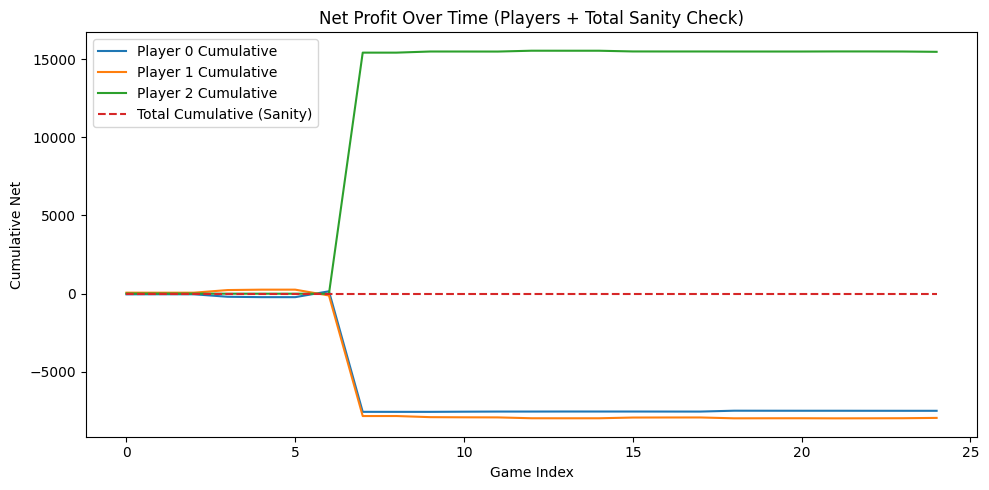

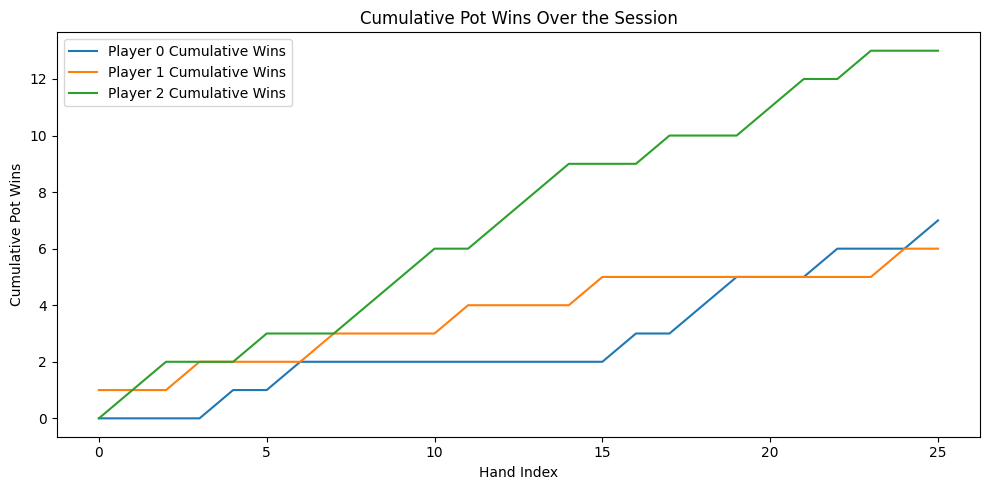

In [69]:
df2 = pd.read_csv("test1_1.csv")
plot_cumulative_net(df2)
plot_cumulative_pot_wins(df2)


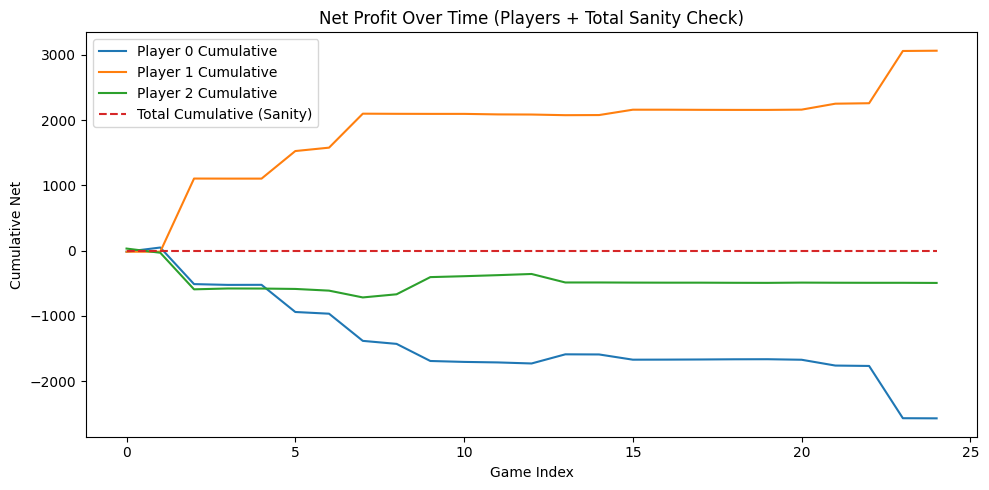

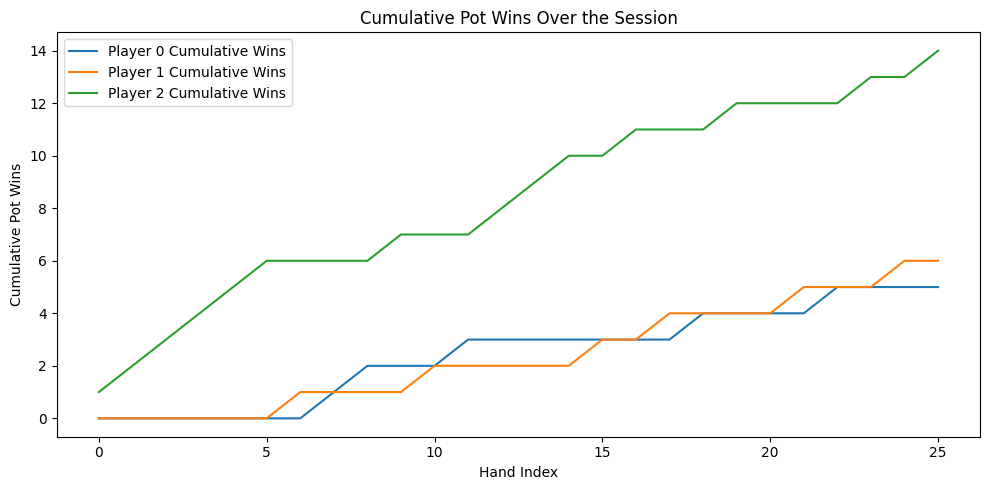

In [70]:
df2 = pd.read_csv("test1_2.csv")
plot_cumulative_net(df2)
plot_cumulative_pot_wins(df2)


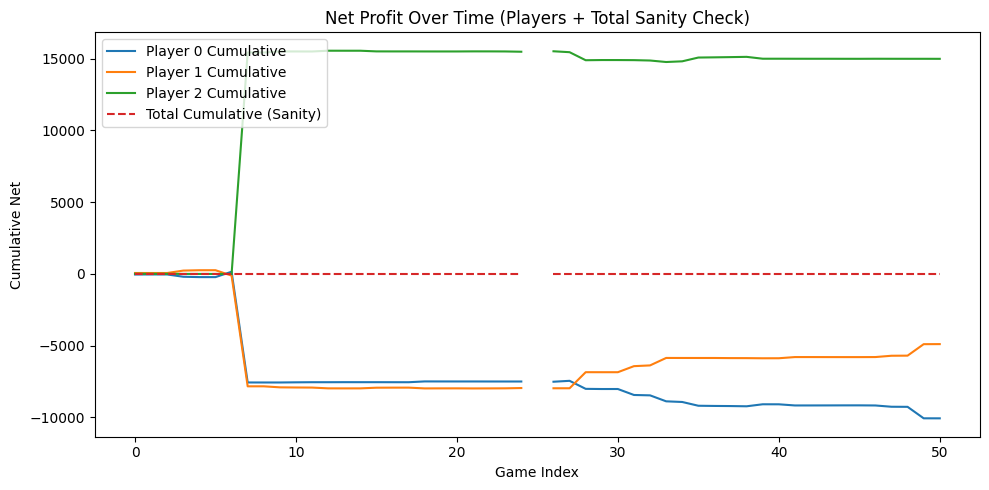

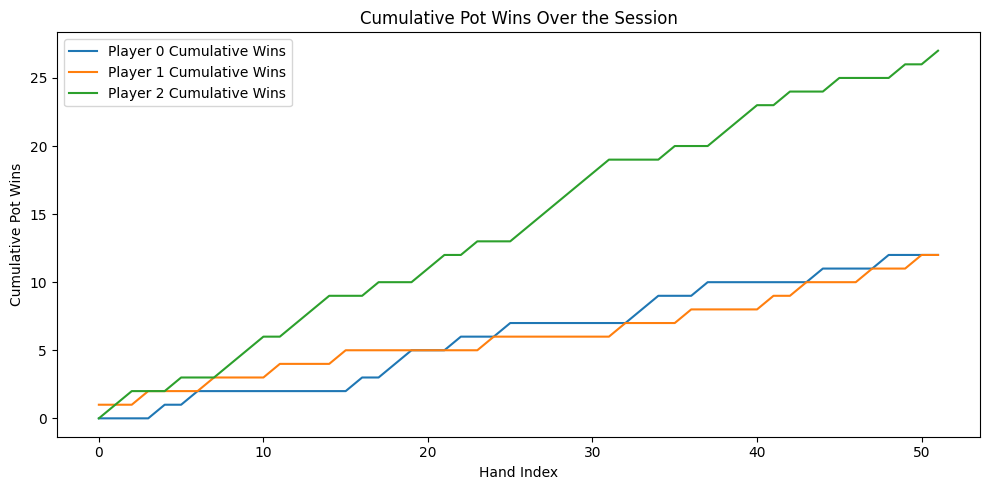

In [76]:
df2 = pd.concat([pd.read_csv("test1_1.csv"), pd.read_csv("test1_2.csv")], ignore_index=True)
# Reset game_index to be continuous after concatenation
df2["game_index"] = range(len(df2))
plot_cumulative_net(df2)
plot_cumulative_pot_wins(df2)
